## Medical Insurance Cost Analysis
In this Notebook, We are using a dataset called "Medical Personal Cost dataset" from kaggle. We have done Exploratory Data Analysis on the data to know more about the data and can infer some useful insights out of the data. 

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/insurance/insurance.csv


In [2]:
df = pd.read_csv("../input/insurance/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

So as there are no null values in the data, there in no need to worry about any missing values. Now we will use Label Encoder to encode all the categorical features.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.shape

(1338, 7)

So, We have 1338 rows and 7 columns in our dataset.

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


We observe that the range of values are different and there are categorical variable such as gender, smoker and region present.

In [7]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [9]:
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

Here, we calculated the correlation of all the features with our target feature which is "charges". We can understand it better with help of some kind of visualization. For that we will import matplotlib and seaborn, which are famous libraries used for data visualization.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
print(df.corr()) #We will visualize this data with help of seaborm heatmap.

               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181  0.787251
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000 -0.006208
charges   0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208  1.000000


<AxesSubplot:>

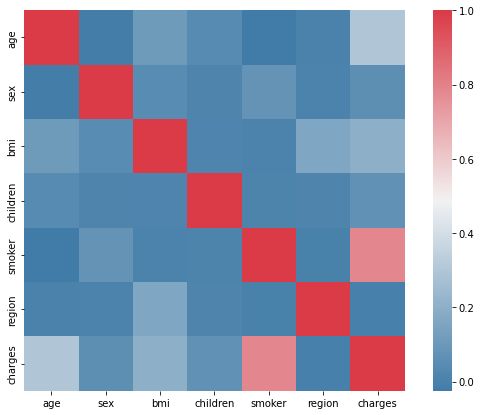

In [12]:
fig, ax = plt.subplots(figsize=(10, 7))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), 
            cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

A strong correlation is observed only with the fact of smoking and charges. Let's explore more about it.

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

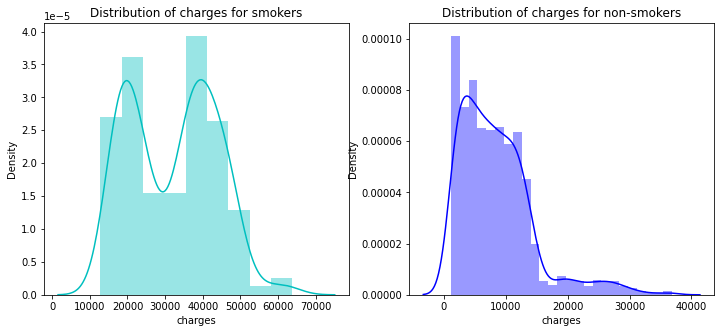

In [13]:
import warnings
warnings.filterwarnings('ignore')
fig= plt.figure(figsize=(12,5))

ax=fig.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=fig.add_subplot(122)
sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

Smoking patients spend more on treatment. Let's check more on how many smokers and how many non-smokers are there in both genders.

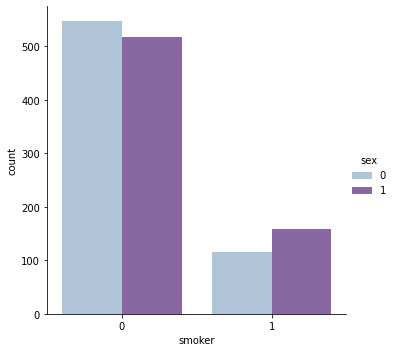

In [14]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="BuPu", data=df);

Here, women are coded with the symbol "0"and men "1". Thus non-smoking people are more in number. Also we can notice that there are more male smokers than women smokers. 

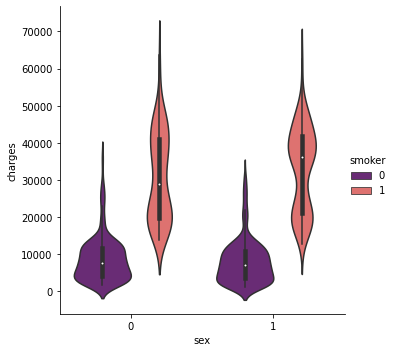

In [15]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=df, palette = 'magma');

Let's make a boxplot between smoker and charges for both the genders to understand the relationship better.

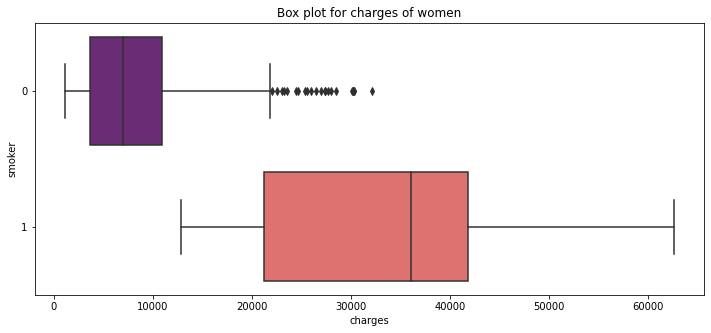

In [16]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 1)] , orient="h", palette = 'magma');

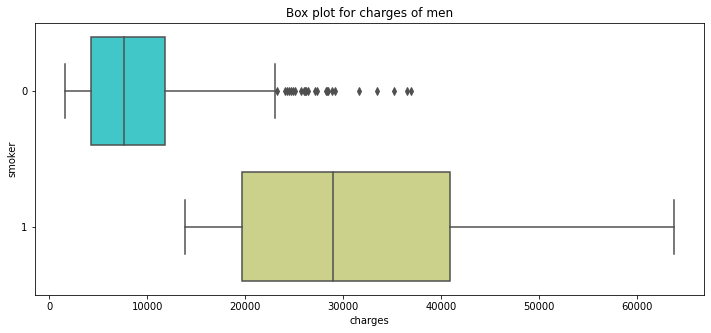

In [17]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 0)] , orient="h", palette = 'rainbow');

Now let's pay attention to the age of the patients. First, let's look at how age affects the cost of treatment, and also look at patients of what age more in our data set.

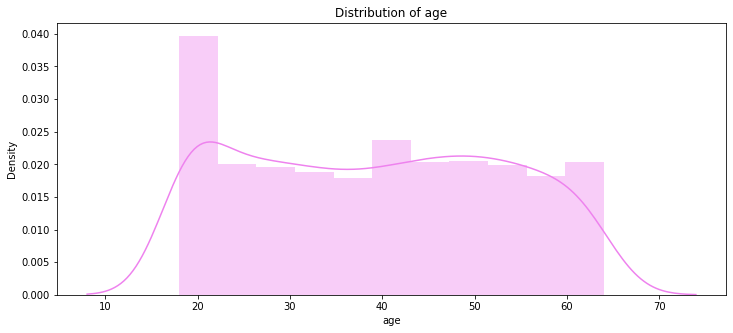

In [18]:
import warnings
warnings.filterwarnings('ignore') 
#To ignore warnings so that our notebook is more presentable

plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(df["age"], color = 'violet')

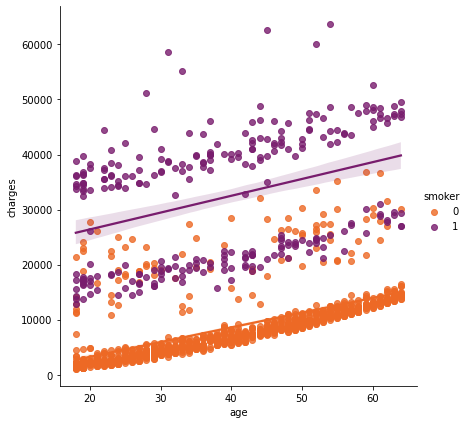

In [19]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df, palette = 'inferno_r', size = 6)
ax.set_title('Smokers and non-smokers');

In non-smokers as well as smokers, we can see that the cost of treatment increases with age.

### Let's pay attention to BMI and its relationship with medical charges.

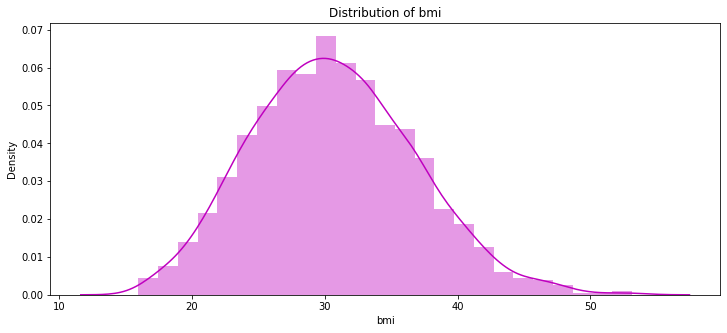

In [20]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(df["bmi"], color = 'm')

So we got a bell curve when we plotted the distribution of BMI in our data. We see that around 30 is our average BMI. Let's see medical charges based on BMI > 30 and BMI < 30.

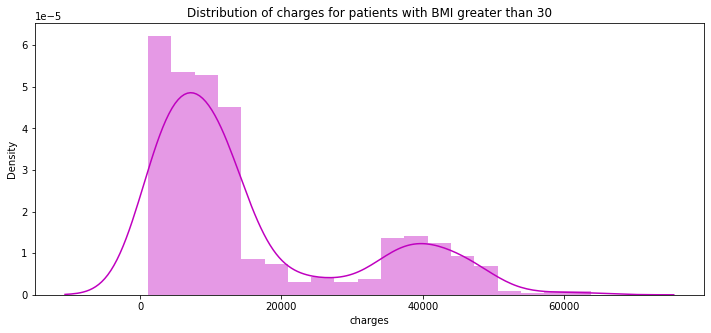

In [21]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(df[(df.bmi >= 30)]['charges'], color = 'm')

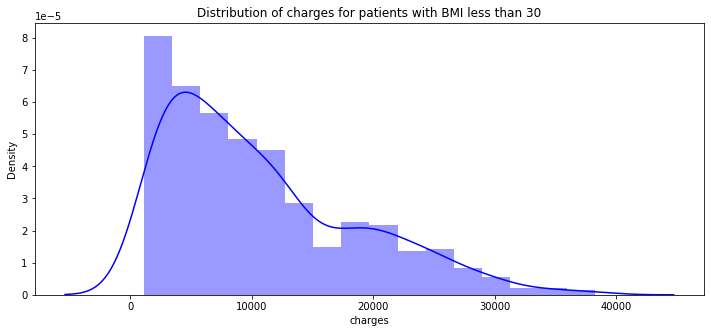

In [22]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(df[(df.bmi < 30)]['charges'], color = 'b')

It is evident from the two graphs that patients with BMI above 30 spend more on treatment!

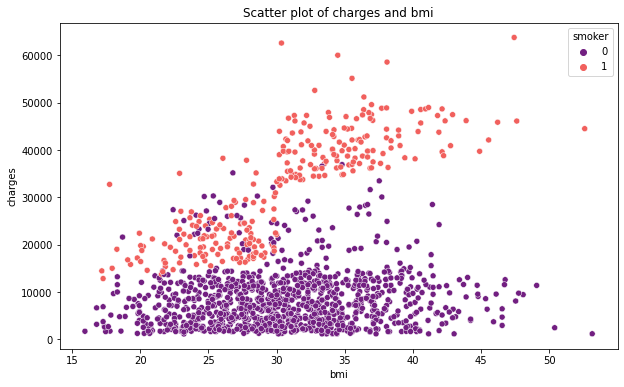

In [23]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi');

As we can see from the scatter plot, With the increase in BMI we see increase in medical charges. We also notice how being a smoker and being a non smoker affects the graph.

Now, let's pay attention to the number of children, patients have, in our data and their relation with our target feature

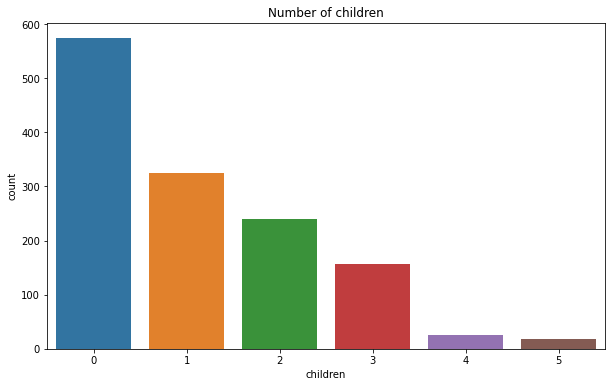

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(data = df,x='children')
plt.title('Number of children')
plt.show()

Most patients do not have children while on the other hand some even have 5 children. Let's see if the factor that patients have children affects the smoking.(Do people with 5 children smoke less?) 

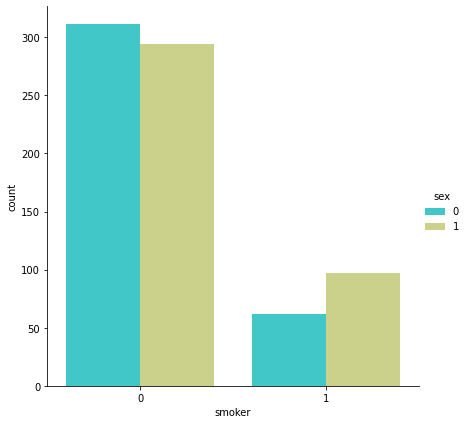

In [25]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=df[(df.children > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have childrens');

We see that patients who have children mostly don't smoke. This is seen in both of the genders.(This make absolute sense as, in general, people do become health consious if they have children)

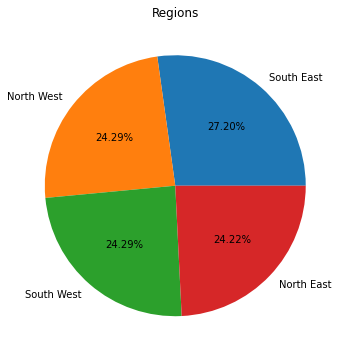

In [26]:
type_value_count = df['region'].value_counts(normalize=True)*100
plt.figure(figsize=(10,6))
plt.pie(type_value_count,labels=['South East','North West','South West','North East'],autopct='%1.2f%%')
plt.title('Regions')
plt.show();